<a href="https://colab.research.google.com/github/aniketsharma00411/episodic_memory/blob/main/LSTM_CNN_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from tensorflow.keras.callbacks import EarlyStopping

import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

# MNIST

In [ ]:
img_dim = 28

In [ ]:
def preprocess(image, label):
  return tf.cast(tf.reshape(image, (img_dim, 1, img_dim)), tf.float32)/255., label

In [ ]:
(mnist_train, mnist_test), mnist_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

mnist_train = mnist_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
mnist_train = mnist_train.cache()
mnist_train = mnist_train.shuffle(mnist_info.splits['train'].num_examples)
mnist_train = mnist_train.batch(32)
mnist_train = mnist_train.prefetch(tf.data.AUTOTUNE)

mnist_test = mnist_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
mnist_test = mnist_test.batch(32)
mnist_test = mnist_test.cache()
mnist_test = mnist_test.prefetch(tf.data.AUTOTUNE)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

In [ ]:
model1 = Sequential()

model1.add(TimeDistributed(LSTM(256), input_shape=(img_dim,1,img_dim)))
model1.add(Dense(img_dim, activation='sigmoid'))

model1.add(Reshape((img_dim, img_dim, 1)))

model1.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dropout(0.5))
model1.add(Dense(units=32, activation='relu'))

model1.add(Dense(units=10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 28, 256)          291840    
 ibuted)                                                         
                                                                 
 dense (Dense)               (None, 28, 28)            7196      
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        3

In [ ]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history1 = model1.fit(
    mnist_train,
    epochs=10,
    callbacks=[early_stopping],
    validation_data=mnist_test
    )

Epoch 1/10
1875/1875 [==============================] - 69s 17ms/step - loss: 0.5500 - accuracy: 0.8074 - val_loss: 0.0932 - val_accuracy: 0.9715
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1250 - accuracy: 0.9606 - val_loss: 0.0630 - val_accuracy: 0.9808
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0968 - accuracy: 0.9703 - val_loss: 0.0513 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0806 - accuracy: 0.9755 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0733 - accuracy: 0.9765 - val_loss: 0.0462 - val_accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0396 - val_accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0381 -

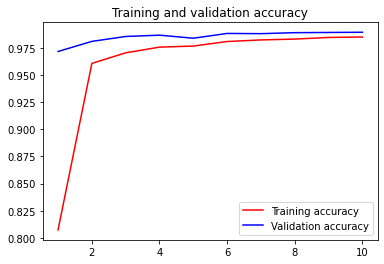

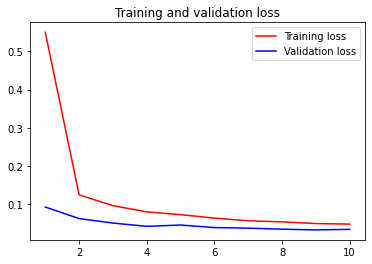

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model1.evaluate(mnist_train)

1875/1875 [==============================] - 14s 7ms/step - loss: 0.0227 - accuracy: 0.9925


[0.022676270455121994, 0.9925000071525574]

In [ ]:
model1.evaluate(mnist_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0350 - accuracy: 0.9892


[0.034954801201820374, 0.9891999959945679]

In [ ]:
model1.save('LSTM_CNN_MNIST.h5')

# CIFAR-10

In [ ]:
img_dim = 32

In [ ]:
def preprocess(image, label):
  return tf.cast(tf.reshape(image, (img_dim, 1, img_dim*3)), tf.float32)/255., label

In [ ]:
(cifar10_train, cifar10_test), cifar10_info = tfds.load(
    'cifar10',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

cifar10_train = cifar10_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
cifar10_train = cifar10_train.cache()
cifar10_train = cifar10_train.shuffle(cifar10_info.splits['train'].num_examples)
cifar10_train = cifar10_train.batch(32)
cifar10_train = cifar10_train.prefetch(tf.data.AUTOTUNE)

cifar10_test = cifar10_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
cifar10_test = cifar10_test.batch(32)
cifar10_test = cifar10_test.cache()
cifar10_test = cifar10_test.prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete66OM7U/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incomplete66OM7U/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
cifar10_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

In [ ]:
model2 = Sequential()

model2.add(TimeDistributed(LSTM(256), input_shape=(img_dim,1,img_dim*3)))
model2.add(Dense(img_dim*3, activation='sigmoid'))

model2.add(Reshape((img_dim, img_dim, 3)))

model2.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dropout(0.5))
model2.add(Dense(units=32, activation='relu'))

model2.add(Dense(units=10, activation='softmax'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_1 (TimeDis  (None, 32, 256)          361472    
 tributed)                                                       
                                                                 
 dense_3 (Dense)             (None, 32, 96)            24672     
                                                                 
 reshape_1 (Reshape)         (None, 32, 32, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)       

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history2 = model2.fit(
    cifar10_train,
    epochs=30,
    callbacks=[early_stopping],
    validation_data=cifar10_test
    )

Epoch 1/30
1563/1563 [==============================] - 44s 19ms/step - loss: 1.8979 - accuracy: 0.2953 - val_loss: 1.5491 - val_accuracy: 0.4366
Epoch 2/30
1563/1563 [==============================] - 26s 17ms/step - loss: 1.5336 - accuracy: 0.4410 - val_loss: 1.4051 - val_accuracy: 0.4880
Epoch 3/30
1563/1563 [==============================] - 24s 16ms/step - loss: 1.4320 - accuracy: 0.4814 - val_loss: 1.3411 - val_accuracy: 0.5114
Epoch 4/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3633 - accuracy: 0.5084 - val_loss: 1.2897 - val_accuracy: 0.5388
Epoch 5/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.3172 - accuracy: 0.5260 - val_loss: 1.2438 - val_accuracy: 0.5531
Epoch 6/30
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2678 - accuracy: 0.5426 - val_loss: 1.2206 - val_accuracy: 0.5606
Epoch 7/30
1563/1563 [==============================] - 23s 15ms/step - loss: 1.2351 - accuracy: 0.5546 - val_loss: 1.2432 -

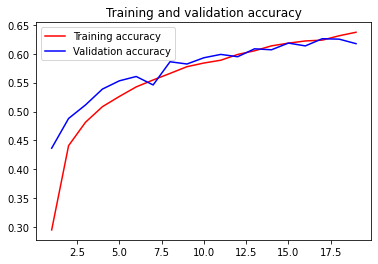

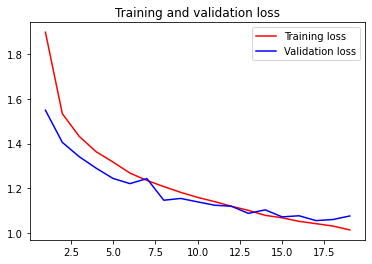

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model2.evaluate(cifar10_train)

1563/1563 [==============================] - 12s 7ms/step - loss: 0.8788 - accuracy: 0.6901


[0.8787593841552734, 0.690060019493103]

In [ ]:
model2.evaluate(cifar10_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.0552 - accuracy: 0.6259


[1.0552098751068115, 0.6258999705314636]

In [ ]:
model2.save('LSTM_CNN_CIFAR10.h5')

# Fashion MNIST

In [ ]:
img_dim = 28

In [ ]:
def preprocess(image, label):
  return tf.cast(tf.reshape(image, (img_dim, 1, img_dim)), tf.float32)/255., label

In [ ]:
(fashion_mnist_train, fashion_mnist_test), fashion_mnist_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

fashion_mnist_train = fashion_mnist_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
fashion_mnist_train = fashion_mnist_train.cache()
fashion_mnist_train = fashion_mnist_train.shuffle(fashion_mnist_info.splits['train'].num_examples)
fashion_mnist_train = fashion_mnist_train.batch(32)
fashion_mnist_train = fashion_mnist_train.prefetch(tf.data.AUTOTUNE)

fashion_mnist_test = fashion_mnist_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
fashion_mnist_test = fashion_mnist_test.batch(32)
fashion_mnist_test = fashion_mnist_test.cache()
fashion_mnist_test = fashion_mnist_test.prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ9QUEV/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteZ9QUEV/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
fashion_mnist_info

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [ ]:
model3 = Sequential()

model3.add(TimeDistributed(LSTM(256), input_shape=(img_dim,1,img_dim)))
model3.add(Dense(img_dim, activation='sigmoid'))

model3.add(Reshape((img_dim, img_dim, 1)))

model3.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dropout(0.5))
model3.add(Dense(units=32, activation='relu'))

model3.add(Dense(units=10, activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_2 (TimeDis  (None, 28, 256)          291840    
 tributed)                                                       
                                                                 
 dense_6 (Dense)             (None, 28, 28)            7196      
                                                                 
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)       

In [ ]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

In [ ]:
history3 = model3.fit(
    fashion_mnist_train,
    epochs=25,
    callbacks=[early_stopping],
    validation_data=fashion_mnist_test
    )

Epoch 1/25
1875/1875 [==============================] - 42s 16ms/step - loss: 0.8085 - accuracy: 0.6931 - val_loss: 0.4837 - val_accuracy: 0.8179
Epoch 2/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4579 - accuracy: 0.8316 - val_loss: 0.4206 - val_accuracy: 0.8430
Epoch 3/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.4031 - accuracy: 0.8514 - val_loss: 0.3739 - val_accuracy: 0.8608
Epoch 4/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3712 - accuracy: 0.8633 - val_loss: 0.3619 - val_accuracy: 0.8628
Epoch 5/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3530 - accuracy: 0.8698 - val_loss: 0.3460 - val_accuracy: 0.8720
Epoch 6/25
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3358 - accuracy: 0.8762 - val_loss: 0.3331 - val_accuracy: 0.8734
Epoch 7/25
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3255 - accuracy: 0.8799 - val_loss: 0.3333 -

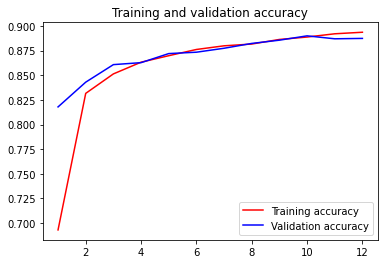

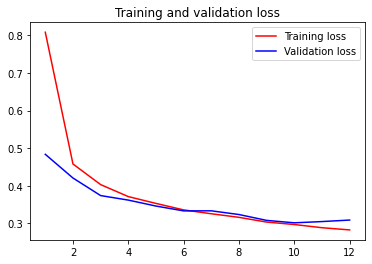

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model3.evaluate(fashion_mnist_train)

1875/1875 [==============================] - 13s 7ms/step - loss: 0.2431 - accuracy: 0.9085


[0.24311836063861847, 0.9085333347320557]

In [ ]:
model3.evaluate(fashion_mnist_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3014 - accuracy: 0.8900


[0.3013990819454193, 0.8899999856948853]

In [ ]:
model3.save('LSTM_CNN_Fashion_MNIST.h5')